<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 2 - Redes Neuronales Convolucionales y Recurrentes </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Entrenamiento de Redes Neuronales Profundas. 
* Modelos de Auto-Encoder
* Redes Convolucionales y Recurrentes. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 12 de Junio en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 26 de Junio, horario de clases.
* Fecha de entrega de vídeo: 2 días antes de encuentro.
* Fecha de entrega de Jypter (notebook): commits hasta 2 días antes del encuentro. 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


<a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 


> Tema 1. Un autoencoder simétrico (la arquitectura del encoder es espejo del encoder) es más efectivo para aprender una representación que un autoencoder asimétrico Esto vale tanto para arquitecturas densas como convolucionales. 

> Tema 2. Un denoising autoencoder (DAE) logra la misma robustez de representación que un autoencoder variacional (VAE).

> Tema 3. Usando etiquetas, es posible mejorar significativamente la calidad de las representaciones aprendidas por un autoencoder, aún si se dispone de un pequeño porcentaje de datos con ellas. 

> Tema 4. Regularizar un autoencoder para obtener representaciones *sparse* (dispersas) permite mejorar la calidad de las representaciones obtenidas para datos que no están en el conjunto de entrenamiento. 

> Tema 5. Una arquitectura con encoder profundo y decoder no profundo (1 capa) es más efectiva que una con decoder profundo y encoder no profundo (1 capa). Esto vale tanto para arquitecturas densas como convolucionales. 

> Tema 6. En un VAE, modificar el regularizador, KL(q(z|x)|p(z)), para que sea simétrico, no tiene ningún efecto práctico sobre la representación aprendida.

> Tema 7. Organizando adecuadamente las capas, *Dropout* es mucho más efectivo que *BatchNormalization* para regularizar redes convolucionales profundas y juntos no funcionan muy bien. 

> Tema 8.  Los optimizadores más populares en deep learning (*AdaGrad, RMSProp, Adam* y *Nadam*) funcionan mejor que un simple SGD porque evitan que la red caiga en óptimos locales con alto error de predicción. 

> Tema 9. *BatchNormalization* facilita el entrenamiento de una red porque reduce el covariate shift interno y estabiliza la magnitud de los gradientes.  

> Tema 10. Una red *LSTM* ó *GRU* permite aprender dependencias de mucho más largo plazo y más eficientemente que una red recurrente tipo *Elman*.

> Tema 11. En un problema en que hay dependencias temporales de largo plazo, una red recurrente *bidireccional* será siempre más efectiva que una red *uni-direccional*. 

> Tema 12. Una red recurrente es un modelo más efectivo para predicción de *series de tiempo* que un modelo auto-regresivo denso (feed-forward).

> Tema 13. No tiene sentido usar una red convolucional para aprendizaje de secuencias, su error será siempre mayor que el de una red recurrente.

> Tema 14. En predicción de series de tiempo con redes recurrentes, *Dropout* permite obtener intervalos de confianza para la predicción que cubren bien el valor real.

> Tema 15. En un problema de apredizaje seq-2-seq, una red recurrente con mecanismos atencionales será siempre más efectiva que una arquitectura recurrente encoder-decoder sin atención.

> Tema 16. Al resolver un problema de apredizaje seq-2-seq, una encoder recurrente no tiene ventajas sobre un encoder convolucional si se utilizan mecanismos atencionales en el decoder.

**Reglas mínimas**: Validar en al menos 1 dataset sintético y 2 reales.


In [1]:
#More Metricts
import tensorflow as tf
from tensorflow import keras
import keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [152]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, SpatialDropout1D, Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Input, Activation, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras import backend as K
from keras import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join, isdir
import pandas as pd

# 1.Primera Parte

## Dataset 1: IMDB Keras

In [54]:
num_words=1000

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25000,)
y_train shape: (25000,)
x_test shape: (25000,)
y_test shape: (25000,)


In [55]:
max_ = [(len(x),i) for i,x in enumerate(x_train)]
max_ = max(max_)
max_

(2494, 17934)

In [56]:
max_=(80,0)

In [57]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(x_train, maxlen=max_[0])
x_test = sequence.pad_sequences(x_test, maxlen=max_[0])

In [8]:
embedding_dim=32

In [60]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, embedding_dim, input_length=max_[0]))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(10, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])
hist_lstm = model_lstm.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,validation_data = (x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 34s 1ms/step - loss: 0.5900 - accuracy: 0.6862 - f1_m: 0.6565 - precision_m: 0.6909 - recall_m: 0.6835 - val_loss: 0.4372 - val_accuracy: 0.7983 - val_f1_m: 0.7931 - val_precision_m: 0.8099 - val_recall_m: 0.7796
Epoch 2/5
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4464 - accuracy: 0.7986 - f1_m: 0.7960 - precision_m: 0.8033 - recall_m: 0.7944 - val_loss: 0.4070 - val_accuracy: 0.8142 - val_f1_m: 0.8184 - val_precision_m: 0.7967 - val_recall_m: 0.8437
Epoch 3/5
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4304 - accuracy: 0.8094 - f1_m: 0.8095 - precision_m: 0.8064 - recall_m: 0.8173 - val_loss: 0.4050 - val_accuracy: 0.8163 - val_f1_m: 0.8162 - val_precision_m: 0.8115 - val_recall_m: 0.8232
Epoch 4/5
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4132 - accuracy: 0.8175 - f1_m: 0.8163 - precision_m: 0.8200

In [ ]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(num_words, embedding_dim, input_length=max_[0]))
model_bilstm.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_bilstm.add(Dense(10, activation='relu'))
model_bilstm.add(Dense(1, activation='sigmoid'))
model_bilstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',f1_m,precision_m, recall_m])

hist_bilstm = model_bilstm.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,validation_data = (x_test,y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 67s 3ms/step - loss: 0.5695 - accuracy: 0.6968 - f1_m: 0.6560 - precision_m: 0.6751 - recall_m: 0.6734 - val_loss: 0.4434 - val_accuracy: 0.8003 - val_f1_m: 0.7897 - val_precision_m: 0.8278 - val_recall_m: 0.7574
Epoch 2/5
25000/25000 [==============================] - 66s 3ms/step - loss: 0.4373 - accuracy: 0.7996 - f1_m: 0.7985 - precision_m: 0.8014 - recall_m: 0.8021 - val_loss: 0.4141 - val_accuracy: 0.8131 - val_f1_m: 0.8006 - val_precision_m: 0.8530 - val_recall_m: 0.7565
Epoch 3/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.4225 - accuracy: 0.8105 - f1_m: 0.8109 - precision_m: 0.8098 - recall_m: 0.8175 - val_loss: 0.4121 - val_accuracy: 0.8097 - val_f1_m: 0.8130 - val_precision_m: 0.7939 - val_recall_m: 0.8353
Epoch 4/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.4084 - accuracy: 0.8188 - f1_m: 0.8179 - precision_m: 0.8178

In [ ]:
r_lstm = model_lstm.evaluate(x_test,y_test)
r_bilstm = model_bilstm.evaluate(x_test,y_test)

25000/25000 [==============================] - 560s 22ms/step


In [ ]:
print('Results')
print ('-----------------')
print('Accuracy   -> LSTM:', r_lstm[1], 'BILSTM', r_bilstm[1])
print('Fscore     -> LSTM:', r_lstm[2], 'BILSTM', r_bilstm[2])
print('Precision  -> LSTM:', r_lstm[3], 'BILSTM', r_bilstm[3])
print('Recall     -> LSTM:', r_lstm[4], 'BILSTM', r_bilstm[4])
print('-------------------')

Results
-----------------
Accuracy   -> LSTM: 0.7815200090408325 BILSTM 0.8535599708557129
Fscore     -> LSTM: 0.7838243246078491 BILSTM 0.8581187725067139
Precision  -> LSTM: 0.7639356255531311 BILSTM 0.816560685634613
Recall     -> LSTM: 0.8158643245697021 BILSTM 0.9120490550994873
-------------------


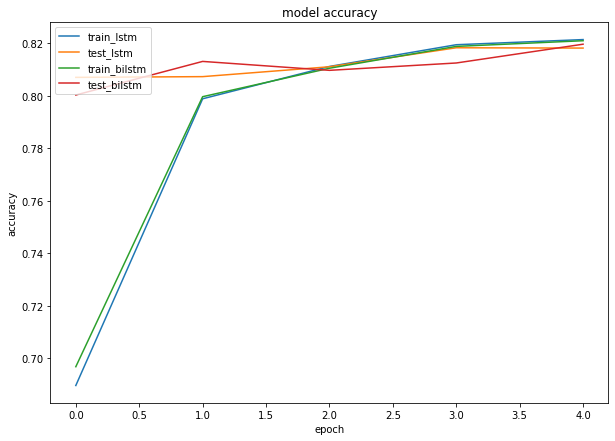

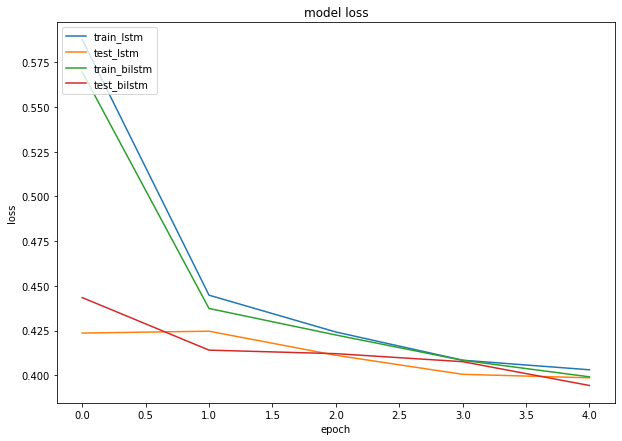

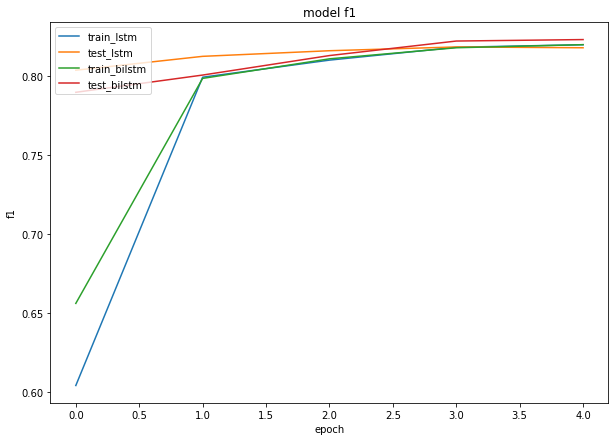

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(hist_lstm.history['accuracy'])
plt.plot(hist_lstm.history['val_accuracy'])
plt.plot(hist_bilstm.history['accuracy'])
plt.plot(hist_bilstm.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(hist_lstm.history['loss'])
plt.plot(hist_lstm.history['val_loss'])
plt.plot(hist_bilstm.history['loss'])
plt.plot(hist_bilstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.show()
# summarize history for fscore
plt.figure(figsize=(10,7))
plt.plot(hist_lstm.history['f1_m'])
plt.plot(hist_lstm.history['val_f1_m'])
plt.plot(hist_bilstm.history['f1_m'])
plt.plot(hist_bilstm.history['val_f1_m'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.show()

## Dataset 2

In [84]:
import pandas as pd
df = pd.read_csv("ner.csv", encoding = "ISO-8859-1", error_bad_lines=False)

b'Skipping line 281837: expected 25 fields, saw 34\n'


In [85]:
df.head()

,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,pos,prev-iob,prev-lemma,prev-pos,prev-prev-iob,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,NNS,__START1__,__start1__,__START1__,__START2__,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,IN,O,thousand,NNS,__START1__,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,NNS,O,of,IN,O,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,VBP,O,demonstr,NNS,O,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,VBN,O,have,VBP,O,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O


In [86]:
dataset=df.drop(['Unnamed: 0', 'lemma', 'next-lemma', 'next-next-lemma', 'next-next-pos',
       'next-next-shape', 'next-next-word', 'next-pos', 'next-shape',
       'next-word', 'prev-iob', 'prev-lemma', 'prev-pos',
       'prev-prev-iob', 'prev-prev-lemma', 'prev-prev-pos', 'prev-prev-shape',
       'prev-prev-word', 'prev-shape', 'prev-word',"pos","shape"],axis=1)

In [87]:
dataset.head()

,sentence_idx,word,tag
0,1.0,Thousands,O
1,1.0,of,O
2,1.0,demonstrators,O
3,1.0,have,O
4,1.0,marched,O


In [88]:
dataset['tag'].value_counts()

O        889973
B-geo     37525
B-tim     20193
B-org     20184
I-per     17382
B-per     17011
I-org     16537
B-gpe     16392
I-geo      7409
I-tim      6298
B-art       434
B-eve       348
I-eve       297
I-art       280
I-gpe       229
B-nat       226
I-nat        76
Name: tag, dtype: int64

In [89]:
class SentenceGetter(object):
    
    def __init__(self, dataset):
        self.n_sent = 1
        self.dataset = dataset
        self.empty = False
        agg_func = lambda s: [(w, t) for w,t in zip(s["word"].values.tolist(),s["tag"].values.tolist())]
        self.grouped = self.dataset.groupby("sentence_idx").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [90]:
getter = SentenceGetter(dataset)

In [91]:
sentences = getter.sentences

In [117]:
print(sentences[0])

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O'), ('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [124]:
maxlen = max([(len(s),s) for s in sentences])

In [125]:
words = list(set(dataset["word"].values))
words.append("ENDPAD")

In [126]:
n_words = len(words)
tags = list(set(dataset["tag"].values))
n_tags = len(tags)
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [127]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=maxlen[0], sequences=X, padding="post",value=n_words - 1)
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=maxlen[0], sequences=y, padding="post", value=tag2idx["O"])

In [128]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]

In [143]:
input = Input(shape=(maxlen[0],))
model = Embedding(input_dim=n_words, output_dim=140, input_length=maxlen[0])(input)
model = Dropout(0.2)(model)
model = LSTM(100, return_sequences=True, recurrent_dropout=0.2)(model)
model = Dense(32, activation="relu")(model)
model = Dropout(0.2)(model)
out = Dense(n_tags, activation="softmax")(model)
model = Model(input, out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m,recall_m])
history_lstm = model.fit(X, np.array(y), batch_size=512, epochs=10, validation_split=0.3, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 14s 562us/step - loss: 0.9734 - accuracy: 0.9252 - f1_m: 0.6865 - precision_m: 0.7556 - recall_m: 0.6577 - val_loss: 0.2062 - val_accuracy: 0.9760 - val_f1_m: 0.9676 - val_precision_m: 0.9821 - val_recall_m: 0.9535
Epoch 2/10
24623/24623 [==============================] - 13s 532us/step - loss: 0.3003 - accuracy: 0.9636 - f1_m: 0.9549 - precision_m: 0.9694 - recall_m: 0.9408 - val_loss: 0.1652 - val_accuracy: 0.9760 - val_f1_m: 0.9708 - val_precision_m: 0.9815 - val_recall_m: 0.9603
Epoch 3/10
24623/24623 [==============================] - 13s 530us/step - loss: 0.2397 - accuracy: 0.9636 - f1_m: 0.9593 - precision_m: 0.9691 - recall_m: 0.9497 - val_loss: 0.1229 - val_accuracy: 0.9760 - val_f1_m: 0.9741 - val_precision_m: 0.9815 - val_recall_m: 0.9667
Epoch 4/10
24623/24623 [==============================] - 13s 529us/step - loss: 0.1602 - accuracy: 0.9640 - f1_m: 0.9684 - precisi

In [142]:
input = Input(shape=(maxlen[0],))
model = Embedding(input_dim=n_words, output_dim=140, input_length=maxlen[0])(input)
model = Dropout(0.2)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.2))(model)
model = Dense(32, activation="relu")(model)
model = Dropout(0.2)(model)
out = Dense(n_tags, activation="softmax")(model)  # softmax output layer
model = Model(input, out)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy",f1_m,precision_m,recall_m])
history = model.fit(X, np.array(y), batch_size=512, epochs=10, validation_split=0.3, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 27s 1ms/step - loss: 0.7297 - accuracy: 0.9441 - f1_m: 0.7667 - precision_m: 0.8096 - recall_m: 0.7563 - val_loss: 0.1434 - val_accuracy: 0.9760 - val_f1_m: 0.9761 - val_precision_m: 0.9762 - val_recall_m: 0.9760
Epoch 2/10
24623/24623 [==============================] - 26s 1ms/step - loss: 0.1979 - accuracy: 0.9636 - f1_m: 0.9626 - precision_m: 0.9655 - recall_m: 0.9597 - val_loss: 0.1064 - val_accuracy: 0.9760 - val_f1_m: 0.9761 - val_precision_m: 0.9762 - val_recall_m: 0.9760
Epoch 3/10
24623/24623 [==============================] - 26s 1ms/step - loss: 0.1481 - accuracy: 0.9638 - f1_m: 0.9696 - precision_m: 0.9783 - recall_m: 0.9611 - val_loss: 0.0764 - val_accuracy: 0.9768 - val_f1_m: 0.9840 - val_precision_m: 0.9930 - val_recall_m: 0.9752
Epoch 4/10
24623/24623 [==============================] - 26s 1ms/step - loss: 0.1086 - accuracy: 0.9672 - f1_m: 0.9772 - precision_m: 0.

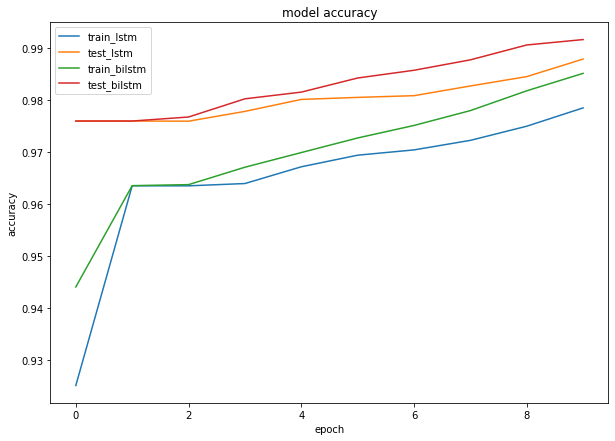

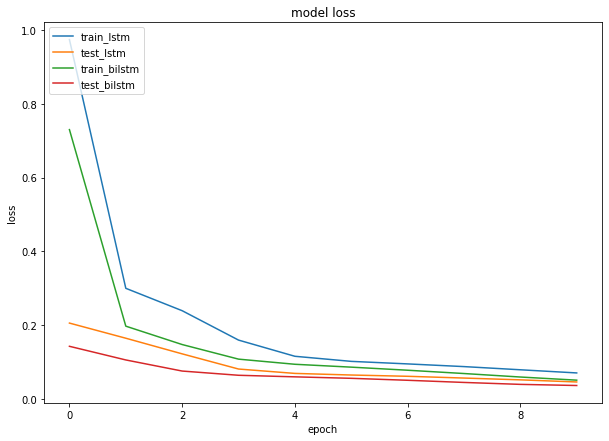

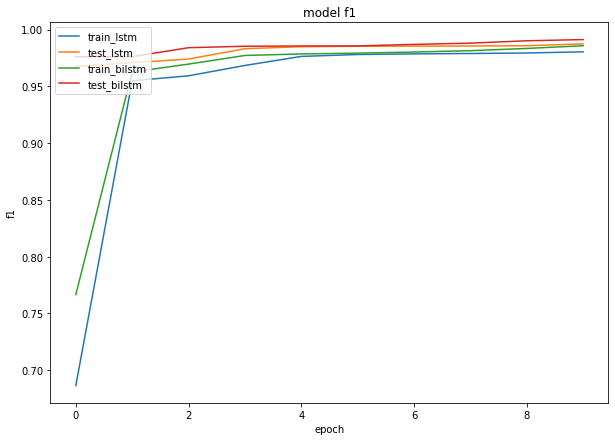

In [144]:
plt.figure(figsize=(10,7))
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.savefig('dataset2-acc.png')
plt.show()
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.savefig('dataset2-loss.png')
plt.show()
# summarize history for fscore
plt.figure(figsize=(10,7))
plt.plot(history_lstm.history['f1_m'])
plt.plot(history_lstm.history['val_f1_m'])
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model f1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train_lstm', 'test_lstm','train_bilstm', 'test_bilstm'], loc='upper left')
plt.savefig('dataset2-f1.png')
plt.show()

## Dataset 3 Sintético


In [158]:
import random
def get_sequence(n_timesteps, window):
  X = np.array([random.random() for _ in range(n_timesteps)])
  y = []
  for x in range(n_timesteps):
    part_izq = sum(X[x-window: x])
    part_der = sum(X[x: x+window])
    if part_izq > part_der:
      y.append(1)
    else:
      y.append(0)
  y= np.array(y)
  # reshape input and output data to be suitable for LSTMs
  X = X.reshape(1, n_timesteps, 1)
  y = y.reshape(1, n_timesteps, 1)
  return X, y

In [146]:
def get_lstm_model(n_timesteps, backwards):
	model = Sequential()
	model.add(LSTM(20, input_shape=(n_timesteps, 1), return_sequences=True, go_backwards=backwards))
	model.add(TimeDistributed(Dense(1, activation='sigmoid')))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
	return model

In [147]:
def get_bi_lstm_model(n_timesteps, mode):
  model = Sequential()
  model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1), merge_mode=mode))
  model.add(TimeDistributed(Dense(1, activation='sigmoid')))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
  return model

In [148]:
def train_model(model, example):
  loss = list()
  for data in example:
      # fit model for one epoch on this sequence
      hist = model.fit(data[0], data[1], epochs=1, batch_size=1, verbose=0)
      loss.append(hist)
  return loss

In [149]:
def create_data(n_timesteps, cant_examples, ventana):
  example = []
  for _ in range(cant_examples):
    x, y =  get_sequence(n_timesteps, ventana)
    example.append([x,y])
  return example

In [159]:
n_timesteps = 1000
cant_examples = 150
ventana = 50
example = create_data(n_timesteps, cant_examples, ventana)

In [160]:
model_uni = get_lstm_model(n_timesteps, False)
result_uni = train_model(model_uni, example)

In [161]:
model_bi = get_bi_lstm_model(n_timesteps, 'concat')
result_bi = train_model(model_bi, example)

In [ ]:
result_uni[149].history['loss'][0]

0.6168677806854248

In [ ]:
result_bi[149].history['loss'][0]

0.4362691640853882

In [ ]:
# generate new random sequence
x_test, y_test = get_sequence(n_timesteps, ventana)
# fit model for one epoch on this sequence
result_test_uni = model_uni.evaluate(x_test, y_test)
result_test_uni

1/1 [==============================] - 0s 269ms/step


[0.6026564836502075,
 0.6470000147819519,
 0.43338680267333984,
 0.971222996711731,
 0.2789256274700165]

In [ ]:
result_test_bi = model_bi.evaluate(x_test, y_test)
result_test_bi

1/1 [==============================] - 0s 387ms/step


[0.3730255365371704,
 0.8939999938011169,
 0.8922763466835022,
 0.878000020980835,
 0.9070248007774353]

In [ ]:
def get_data_plt(name, cant_examples):
  valor_uni = []
  valor_bi = []
  for x in range(cant_examples):
    valor_uni.append(result_uni[x].history[name][0])
    valor_bi.append(result_bi[x].history[name][0])
  plt.figure(figsize=(10,7))
  plt.plot(valor_uni,'r', valor_bi, 'g')
  plt.legend(['uni','bi'], loc='upper left')
  plt.title('Funtion ' + name)
  plt.xlabel('Iteration')
  plt.ylabel(name)
  plt.savefig('img'+name+'.png')
  plt.show() 
  return None


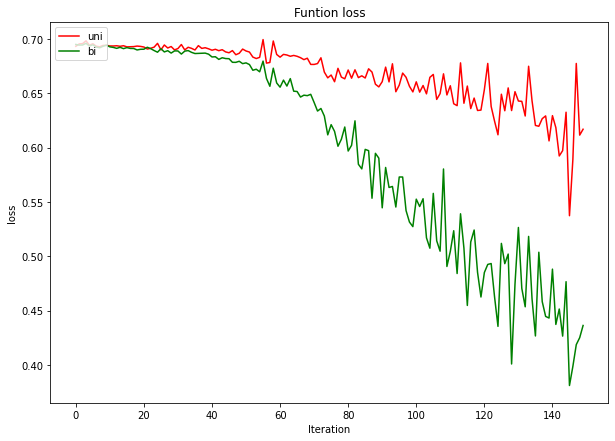

In [ ]:
get_data_plt('loss', cant_examples)

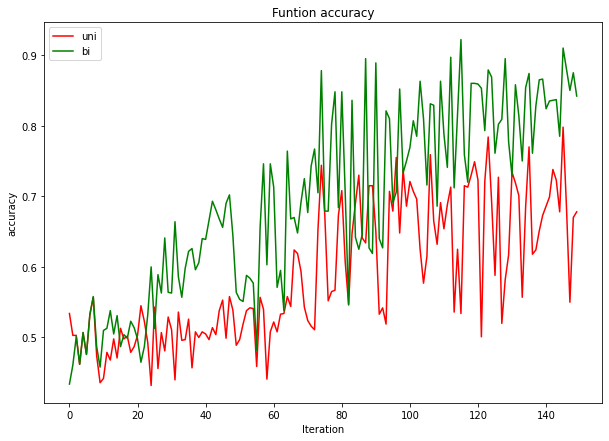

In [ ]:
get_data_plt('accuracy', cant_examples)

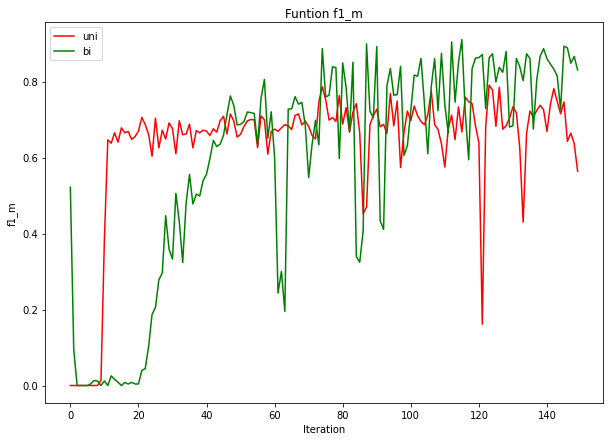

In [ ]:
get_data_plt('f1_m', cant_examples)

# 2.Challenge Kaggle


In [ ]:
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "./taller2ann-usm.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip1: 
    # printing all the contents of the zip file 
    zip1.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip1.extractall() 
    print('Done!')

File Name                                             Modified             Size
sample_submission.csv                          2020-06-05 18:58:16         5761
test/265953285247209472.txt                    2020-06-05 18:58:16        19294
test/318263294098030593.txt                    2020-06-05 18:58:16       124244
test/356268980211687424.txt                    2020-06-05 18:58:16        11085
test/365052155385749505.txt                    2020-06-05 18:58:16        12755
test/366205297557110784.txt                    2020-06-05 18:58:18        14737
test/380055172896272384.txt                    2020-06-05 18:58:18        35412
test/387006553124896768.txt                    2020-06-05 18:58:18        14109
test/387031585834278912.txt                    2020-06-05 18:58:18        10653
test/407158558158254081.txt                    2020-06-05 18:58:18        50622
test/407159686786732032.txt                    2020-06-05 18:58:18         7947
test/407163869673443328.txt             

In [ ]:
### Entrenamiento texto
import pandas as pd
labels = pd.read_csv("train_labels.csv")
print(labels['label'].value_counts())

tweets = pd.read_csv("train_source_tweets.txt",  sep="\t", header = None, names=["id", "tweets"])
tweets = pd.merge(tweets, labels, on=['id'], how='outer')
print(tweets.columns)

non-rumor     524
false         520
true          514
unverified    368
Name: label, dtype: int64
Index(['id', 'tweets', 'label'], dtype='object')


In [ ]:
tweets['label']

0        non-rumor
1       unverified
2            false
3        non-rumor
4             true
           ...    
1921          true
1922    unverified
1923          true
1924         false
1925          true
Name: label, Length: 1926, dtype: object

In [ ]:
dict_clases = {'true':0,'false':1,'non-rumor':2,'unverified':3}

y = np.vectorize(dict_clases.get)(tweets['label'])
y

array([2, 3, 1, ..., 0, 1, 0])

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
y

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweets['tweets'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet)

vocab_size = len(tokenizer.word_index) + 1

encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs)

In [ ]:
input_len = padded_sequence.shape[1]
input_len

32

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded_sequence,y , test_size = 0.20)
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_val))

Ejemplos usados para entrenar:  1540
Ejemplos usados para test:  386


In [ ]:
sum(y_train)

array([412., 413., 423., 292.], dtype=float32)

In [ ]:
sum(y_val)

array([102., 107., 101.,  76.], dtype=float32)

In [ ]:
embedding_dim = 32

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [ ]:
# create the model
embedding_vecor_length = 55
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=input_len))
model.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])
print(model.summary())
model.fit(padded_sequence, y, epochs=40, batch_size=64,verbose = 1, callbacks=[es], validation_split=0.1)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_31 (Embedding)     (None, 32, 55)            331815    
_________________________________________________________________
spatial_dropout1d_31 (Spatia (None, 32, 55)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 64)                30720     
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 260       
Total params: 362,795
Trainable params: 362,795
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1733 samples, validate on 193 samples
Epoch 1/40
1733/1733 [==============================] - 2s 1ms/step - loss: 1.3766 - accuracy: 0.2914 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3717 - val_accuracy: 0.2383 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/40
1733/1733 [==============================] - 2s 1ms/step - loss: 1.3510 - accuracy: 0.3883 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 1.3399 - val_accuracy: 0.3264 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/40
1733/1733 [==============================] - 2s 1ms/step - loss: 1.2929 - accuracy: 0.4801 - f1_m: 0.0043 - precision_m: 0.1012 - recall_m: 0.0022 - val_loss: 1.2293 - val_accuracy: 0.5181 - val_f1_m: 0.0077 - val_precision_m: 0.2500 - val_recall_m: 0.0039
Epoch 4/40
1733/1733 [==============================] - 2s 1ms/step - loss: 1.0660 - accuracy: 0.5822

In [ ]:
test = pd.read_csv("test_source_tweets.txt",  sep="\t", header = None, names=["id", "tweets"])
test

,id,tweets
0,689719109785907200,death toll from #bachakhanuniattack rises to a...
1,531300385248800768,"the head of isis, abu bakr al-baghdadi, is sai..."
2,652992524504600576,steve jobs was adopted. his biological father ...
3,509473920060104704,microsoft to buy mojang - report URL $2 billio...
4,651321040119963648,el chapo puts $100 million bounty on donald tr...
...,...,...
208,642432477185867776,the stickers on fruit are edible.
209,693236688538243074,"is the truth out there? in nod to @thexfiles, ..."
210,504131150429061121,breaking: fbi uncovers new audio from neighbor...
211,692004901455556608,.@potus just announced new reforms to address ...


In [ ]:
test_docs = tokenizer.texts_to_sequences(test['tweets'].values)
test_padded = pad_sequences(test_docs,maxlen=32)

In [ ]:
test_padded.shape

(213, 32)

In [ ]:
results = model.predict(test_padded)

In [ ]:
results_decoded = [np.argmax(x) for x in results]

In [ ]:
#dict_clases = {'true':0,'false':1,'non-rumor':2,'unverified':3}
dict_encoded = {}
for k,v in dict_clases.items():
  dict_encoded[v]=k

results_decoded = np.vectorize(dict_encoded.get)(results_decoded)
results_decoded

array(['non-rumor', 'unverified', 'false', 'true', 'false', 'false',
       'false', 'true', 'true', 'unverified', 'unverified', 'non-rumor',
       'non-rumor', 'non-rumor', 'true', 'true', 'non-rumor', 'true',
       'non-rumor', 'non-rumor', 'false', 'unverified', 'true', 'false',
       'non-rumor', 'true', 'non-rumor', 'non-rumor', 'true', 'non-rumor',
       'non-rumor', 'non-rumor', 'non-rumor', 'unverified', 'false',
       'non-rumor', 'true', 'true', 'true', 'true', 'true', 'unverified',
       'non-rumor', 'unverified', 'true', 'unverified', 'true', 'false',
       'true', 'true', 'non-rumor', 'false', 'false', 'non-rumor',
       'non-rumor', 'true', 'true', 'false', 'non-rumor', 'true',
       'unverified', 'false', 'false', 'non-rumor', 'non-rumor', 'true',
       'false', 'unverified', 'non-rumor', 'true', 'false', 'non-rumor',
       'true', 'true', 'true', 'non-rumor', 'false', 'true', 'true',
       'true', 'true', 'true', 'true', 'false', 'non-rumor', 'non-rumor',
  

In [ ]:
test['label']=results_decoded

In [ ]:
del test['tweets']

In [ ]:
#ingenieria pura
test['id1']=test['id']
del test['id']
test['id']=test['id1']
del test['id1']
test = test.sort_values('id')

In [ ]:
test

,label,id
196,unverified,265953285247209472
61,false,318263294098030593
136,false,356268980211687424
57,false,365052155385749505
110,false,366205297557110784
...,...,...
133,non-rumor,767203096472719364
111,non-rumor,767541796410839040
64,non-rumor,767668607803359234
169,unverified,778572032531427332


In [ ]:
test.to_csv('sumbmission.csv',index=False)